In [1]:
import pandas as pd
import scipy as sp
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
import collections
from IPython.display import clear_output
import random
import seaborn as sns

In [2]:
Brain_region = ['AI','BA11','BA25','BA89','Nac','Sb']

num_test = [10,50,100,200,300,400,500,600,700,800,900] #number of top ranking DEG

AI_overlap = [None]*len(num_test)
BA11_overlap = [None]*len(num_test)
BA25_overlap = [None]*len(num_test)
BA89_overlap = [None]*len(num_test)
Nac_overlap = [None]*len(num_test)
Sb_overlap = [None]*len(num_test)


In [3]:
for i in range(len(num_test)):
    num_sig = num_test[i]
    xlsx_file = pd.ExcelFile('MaleDEG.xlsx')
    DEG_data = xlsx_file.parse('hMale DEG ')
    AI_ind = DEG_data.index[DEG_data['Brain Region'] == 'Anterior Insula'].tolist()
    BA11_ind = DEG_data.index[DEG_data['Brain Region'] == 'BA11'].tolist()
    BA25_ind = DEG_data.index[DEG_data['Brain Region'] == 'BA25'].tolist()
    BA89_ind = DEG_data.index[DEG_data['Brain Region'] == 'BA8/9'].tolist()
    Nac_ind = DEG_data.index[DEG_data['Brain Region'] == 'Nac'].tolist()
    Sb_ind = DEG_data.index[DEG_data['Brain Region'] == 'Subic'].tolist()
    AI = DEG_data.iloc[AI_ind]
    BA11 = DEG_data.iloc[BA11_ind]
    BA25 = DEG_data.iloc[BA25_ind]
    BA89 = DEG_data.iloc[BA89_ind]
    Nac = DEG_data.iloc[Nac_ind]
    Sb = DEG_data.iloc[Sb_ind]


    regionlist = ['AI']*num_sig + ['BA11']*num_sig+ ['BA25']*num_sig + ['BA89']*num_sig + ['Nac']*num_sig + ['Sb']*num_sig
    AI_sort_M = AI.sort_values(by=['p-value']).iloc[0:num_sig]
    BA11_sort_M = BA11.sort_values(by=['p-value']).iloc[0:num_sig]
    BA25_sort_M = BA25.sort_values(by=['p-value']).iloc[0:num_sig]
    BA89_sort_M = BA89.sort_values(by=['p-value']).iloc[0:num_sig]
    Nac_sort_M = Nac.sort_values(by=['p-value']).iloc[0:num_sig]
    Sb_sort_M = Sb.sort_values(by=['p-value']).iloc[0:num_sig]

    frames = [AI_sort_M ,BA11_sort_M ,BA25_sort_M ,BA89_sort_M ,Nac_sort_M ,Sb_sort_M]
    male_topDEG = pd.concat(frames)

    xlsx_file = pd.ExcelFile('FemaleDEG.xlsx')
    DEG_data = xlsx_file.parse('hFemale DEG')
    AI_ind = DEG_data.index[DEG_data['Brain Region'] == 'Anterior Insula'].tolist()
    BA11_ind = DEG_data.index[DEG_data['Brain Region'] == 'BA11'].tolist()
    BA25_ind = DEG_data.index[DEG_data['Brain Region'] == 'BA25'].tolist()
    BA89_ind = DEG_data.index[DEG_data['Brain Region'] == 'BA8/9'].tolist()
    Nac_ind = DEG_data.index[DEG_data['Brain Region'] == 'Nac'].tolist()
    Sb_ind = DEG_data.index[DEG_data['Brain Region'] == 'Subic'].tolist()
    AI = DEG_data.iloc[AI_ind]
    BA11 = DEG_data.iloc[BA11_ind]
    BA25 = DEG_data.iloc[BA25_ind]
    BA89 = DEG_data.iloc[BA89_ind]
    Nac = DEG_data.iloc[Nac_ind]
    Sb = DEG_data.iloc[Sb_ind]
    regionlist = ['AI']*num_sig + ['BA11']*num_sig+ ['BA25']*num_sig + ['BA89']*num_sig + ['Nac']*num_sig + ['Sb']*num_sig
    AI_sort_F = AI.sort_values(by=['p-value']).iloc[0:num_sig]
    BA11_sort_F = BA11.sort_values(by=['p-value']).iloc[0:num_sig]
    BA25_sort_F = BA25.sort_values(by=['p-value']).iloc[0:num_sig]
    BA89_sort_F = BA89.sort_values(by=['p-value']).iloc[0:num_sig]
    Nac_sort_F = Nac.sort_values(by=['p-value']).iloc[0:num_sig]
    Sb_sort_F = Sb.sort_values(by=['p-value']).iloc[0:num_sig]
    frames = [AI_sort_F ,BA11_sort_F ,BA25_sort_F ,BA89_sort_F ,Nac_sort_F ,Sb_sort_F]
    female_topDEG = pd.concat(frames)

    AI_overlap[i]= len(set(AI_sort_M['Gene name'].tolist()) & set(AI_sort_F['Gene Name'].tolist()))
    BA11_overlap[i]= len(set(BA11_sort_M['Gene name'].tolist()) & set(BA11_sort_F['Gene Name'].tolist()))
    BA25_overlap[i]= len(set(BA25_sort_M['Gene name'].tolist()) & set(BA25_sort_F['Gene Name'].tolist()))
    BA89_overlap[i]= len(set(BA89_sort_M['Gene name'].tolist()) & set(BA89_sort_F['Gene Name'].tolist()))
    Nac_overlap[i]= len(set(Nac_sort_M['Gene name'].tolist()) & set(Nac_sort_F['Gene Name'].tolist()))
    Sb_overlap[i]= len(set(Nac_sort_M['Gene name'].tolist()) & set(Sb_sort_F['Gene Name'].tolist()))


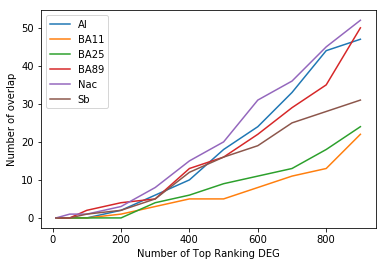

In [28]:
plt.plot(num_test,AI_overlap,num_test,BA11_overlap,num_test,BA25_overlap,num_test,BA89_overlap,num_test,Nac_overlap,num_test,Sb_overlap)
plt.xlabel('Number of Top Ranking DEG')
plt.ylabel('Number of overlap')
plt.legend(['AI','BA11','BA25','BA89','Nac','Sb'])

In [4]:
print('AI:' ,len(set(AI_sort_M['Gene name'].tolist()) & set(AI_sort_F['Gene Name'].tolist())))
print('BA11:' ,len(set(BA11_sort_M['Gene name'].tolist()) & set(BA11_sort_F['Gene Name'].tolist())))
print('BA25:' ,len(set(BA25_sort_M['Gene name'].tolist()) & set(BA25_sort_F['Gene Name'].tolist())))
print('BA89:' ,len(set(BA89_sort_M['Gene name'].tolist()) & set(BA89_sort_F['Gene Name'].tolist())))
print('Nac:' ,len(set(Nac_sort_M['Gene name'].tolist()) & set(Nac_sort_F['Gene Name'].tolist())))
print('Sb:' ,len(set(Nac_sort_M['Gene name'].tolist()) & set(Sb_sort_F['Gene Name'].tolist())))

AI: 47
BA11: 22
BA25: 24
BA89: 50
Nac: 52
Sb: 31


In [5]:
AI_overlap


[0, 0, 0, 2, 6, 10, 18, 24, 33, 44, 47]